# 3.5 표본 통계량 성질

3.5.1 시행

3.5.2 표본분포

3.5.3 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# TODO import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# TODO precision 3 & np.set_printoptions(precision=3) & formatting & .bound(3)
%precision 3

%matplotlib inline

In [31]:
population = stats.norm(loc=4, scale=0.8)
print(type(population))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


3.5.4 표본평균을 여러 번 계산하기

In [3]:
sample_mean_array = np.zeros(10000)

In [32]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

print(sample_mean_array)
np.set_printoptions(precision=2)
print(f"{sample_mean_array}")

print(f"{sample_mean_array[0]:.5f}")

[3.92 3.86 4.07 ... 4.14 4.57 4.1 ]
4.004202422791747


3.5.5 표본평균의 평균값은 모평균에 가깝다

In [5]:
print(f"mean(sample): {np.mean(sample_mean_array)}")
print(f"std (sample): {np.std(sample_mean_array, ddof=1)}")

mean(sample): 4.004202422791747
std (sample): 0.2513580850860402


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


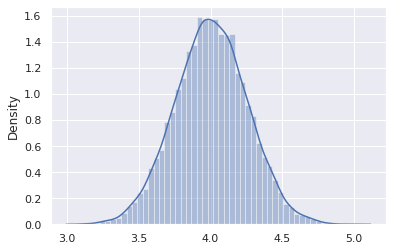

In [6]:
sns.distplot(sample_mean_array)

3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다

In [7]:
size_array = np.arange(start=10, stop=100100, step=100)
print(size_array)

[    10    110    210 ...  99810  99910 100010]


In [8]:
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

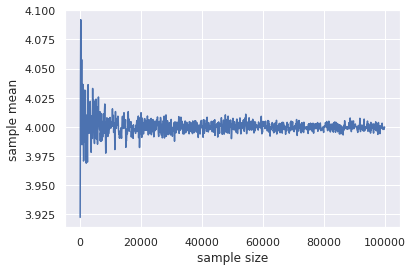

In [9]:
plt.plot(size_array, sample_mean_array_size)
plt.xlabel("sample size")
plt.ylabel("sample mean")

3.5.7 표본평균을 몇 번이고 계산하는 함수 만들기

In [30]:
# TODO function naming rule, population variable (local variable), type hint
def calc_sample_mean(size: int, n_trial: int) -> np.ndarray:
    sample_mean_array: np.ndarray = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample: np.ndarray = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return sample_mean_array

print(type(calc_sample_mean))

<class 'function'>


In [11]:
sample_variable: str = 10000
print(sample_variable)
print(type(sample_variable))

10000
<class 'int'>


In [12]:
np.random.seed(1)
sample_mean_test = calc_sample_mean(size=10, n_trial=10000)
print(f"{sample_mean_test.shape[0]}")
print(f"{np.mean(sample_mean_test)}")

10000
4.004202422791747


3.5.8 샘플사이즈를 바꿨을 때 표본평균의 분산

In [13]:
np.random.seed(1)

# sample size = 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({"sample_mean": size_10, "size": np.tile("size 10", 10000)})

# sample size = 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({"sample_mean": size_20, "size": np.tile("size 20", 10000)})

# sample size = 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({"sample_mean": size_30, "size": np.tile("size 30", 10000)})

# total
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

# TODO DataFrame
print("size_10_df")
print(size_10_df.head())

print("size_20_df")
print(size_20_df.head())

print("size_20_df")
print(size_30_df.head())

print(sim_result.head())

size_10_df
   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10
size_20_df
   sample_mean     size
0     4.021685  size 20
1     3.899744  size 20
2     3.718057  size 20
3     4.110978  size 20
4     3.844960  size 20
size_20_df
   sample_mean     size
0     4.129223  size 30
1     3.772253  size 30
2     4.186896  size 30
3     4.041261  size 30
4     4.102039  size 30
   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


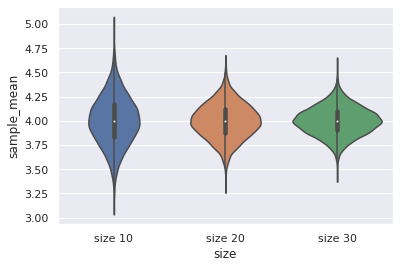

In [14]:
sns.violinplot(x="size", y="sample_mean", data=sim_result)

3.5.9 표본평균의 표준편차는 모집단보다 작다

In [15]:
size_array = np.arange(start=2, stop=102, step=2)
print(size_array)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


In [16]:
sample_mean_std_array = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

Text(0.5, 0, 'mean_std value')

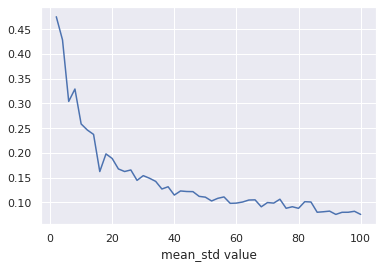

In [17]:
plt.plot(size_array, sample_mean_std_array)
plt.xlabel("sample size")
plt.xlabel("mean_std value")

3.5.10 표준오차(Standard Error, SE)

- 이론상 표본평균의 표준편차 크기는 수식을 사용해서 계산할 수 있습니다.


$$SE = {\sigma \over \sqrt{N}}$$

In [18]:
standard_error = 0.8 / np.sqrt(size_array)
print(standard_error)

[0.566 0.4   0.327 0.283 0.253 0.231 0.214 0.2   0.189 0.179 0.171 0.163
 0.157 0.151 0.146 0.141 0.137 0.133 0.13  0.126 0.123 0.121 0.118 0.115
 0.113 0.111 0.109 0.107 0.105 0.103 0.102 0.1   0.098 0.097 0.096 0.094
 0.093 0.092 0.091 0.089 0.088 0.087 0.086 0.085 0.084 0.083 0.083 0.082
 0.081 0.08 ]


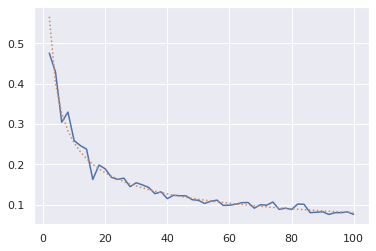

In [19]:
plt.plot(size_array, sample_mean_std_array)
plt.plot(size_array, standard_error, linestyle='dotted')

3.5.11 표준오차의 직관적인 설명

3.5.12 표본분산의 평균값은 모분산과 차이가 있다

In [20]:
sample_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)

print(np.mean(sample_var_array))

0.5746886877332101


3.5.13 불편분산을 사용하면 편향이 사라진다

In [21]:
# TODO unbias variance?
unbias_var_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)

print(np.mean(unbias_var_array))

0.6385429863702334


3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다

In [22]:
size_array = np.arange(start=10, stop=100100, step=100)
print(size_array)

[    10    110    210 ...  99810  99910 100010]


In [23]:
unbias_var_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

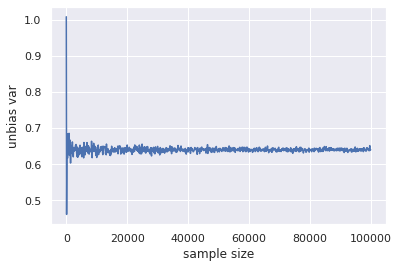

In [24]:
plt.plot(size_array, unbias_var_array_size)
plt.xlabel("sample size")
plt.ylabel("unbias var")

3.5.15 불편성
- 추정량의 기댓값이 진짜 모수 (모집단의 파라미터)가 되는 특성을 불편성이라고 합니다.

3.5.16 일치성
- 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성을 일치성이라고 합니다.

3.5.17 모수에 대해 좋은 추정량

3.5.18 큰수의 법칙
- 큰수의 법칙은 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙입니다.

3.5.19 중심극한정리
- 모집단분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워집니다.

- central limit theorem

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


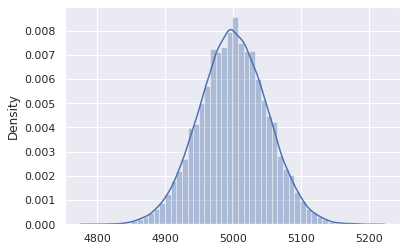

In [25]:
n_size = 10000
n_trial = 50000

coin = np.array([0, 1])

count_coin = np.zeros(n_trial)

np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

sns.distplot(count_coin)